# <font color="red"  face="微软雅黑"><center>《机器学习》</center></font>

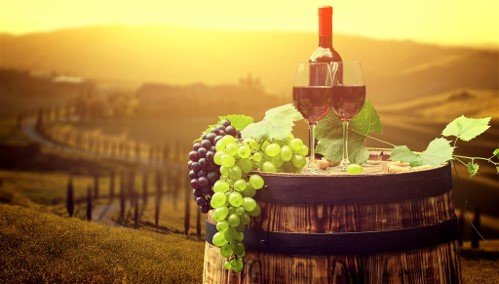

#  <font color=#0099ff  face="微软雅黑"><center>实验六 KNN红葡萄酒品质分类预测</center></font>

## 实验要求：
<hr width="100%" style="margin-top:10px;border:0.5px solid black;"/>

### 【实验目的】
<div style="margin-top:10px;text-indent:2em;dispaly=block"> 
通过用KNN算法对红葡萄酒数据进行分类、掌握导入数据、预处理数据、模型训练、模型评估、模型优化、可视化方法。
</div>

### 【实验环境】
<div style="margin-top:10px;text-indent:2em;dispaly=block"> Windows Anconda  scikit-learn Jupyter Notebook </div>
    
### 【实验内容】

本实验用Sklearn模块的 KNeighborsClassifier对红酒品质好坏进行分类预测


### 【预备知识】

机器学习流程、特征工程技巧、分类模型评价、KNN算法


### 【实验背景】

通过KNN算法对红葡萄酒进行分类


## 数据介绍

### No	特征	                                                    	      字段描述
### 1	fixed acidity	                                            	 非挥发性酸
### 2	volatile acidity	                                            挥发性酸
### 3	citric acid	                                                       柠檬酸
### 4	residual sugar	                                              残糖
### 5	chlorides	                                                      氯化物
### 6	free sulfur dioxide	                                        游离二氧化硫
### 7	total sulfur dioxide	                                    总二氧化硫
### 8	density	                                                           密度
### 9	pH	                                                                  酸碱度
### 10	sulphates                                                       硫酸盐
### 11	alcohol	                                                          酒精
### 12	quality                                                           葡萄酒质量（label）



# 【实验步骤】

## 6. KNN算法预测红葡萄酒品质好坏

## 6-1 读取数据

In [1]:
# 导入包
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
import warnings
warnings.filterwarnings("ignore") # 忽略报错


In [2]:
# 从从本地文件（winequality-red.csv）中读取原始数据，并输出前五行数据
data = pd.read_csv("winequality-red.csv",sep=';',header=1,names=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'])
data.head()


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.8              0.88         0.00             2.6      0.098   
1            7.8              0.76         0.04             2.3      0.092   
2           11.2              0.28         0.56             1.9      0.075   
3            7.4              0.70         0.00             1.9      0.076   
4            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 25.0                  67.0   0.9968  3.20       0.68   
1                 15.0                  54.0   0.9970  3.26       0.65   
2                 17.0                  60.0   0.9980  3.16       0.58   
3                 11.0                  34.0   0.9978  3.51       0.56   
4                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.8        5  
1      9.8        5  
2      9.8        6  
3      9.4        5  
4      9.4        5

## 6-2 查看数据基本信息

In [3]:
#查看数据大小
data.shape


(1598, 12)

In [4]:
# 一次性查看数据的特征、是否有缺失值、数据类型
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1598 non-null   float64
 1   volatile acidity      1598 non-null   float64
 2   citric acid           1598 non-null   float64
 3   residual sugar        1598 non-null   float64
 4   chlorides             1598 non-null   float64
 5   free sulfur dioxide   1598 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1598 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1598 non-null   float64
 10  alcohol               1598 non-null   float64
 11  quality               1598 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


In [5]:
# 查看整个数据集是否存在重复值
data.duplicated().any()


True

In [6]:
#去掉数据集中存在的重复行
data = data.drop_duplicates()


In [7]:
#重新查看数据大小，来了解去除了多少重复数据
data.shape

(1359, 12)

In [8]:
#查看"quality”列每个得分的样本量
target_names = data.groupby("quality").size()
target_names

quality
3     10
4     53
5    577
6    535
7    167
8     17
dtype: int64

## 高品质红酒的定义

### 我们将评分为6分及以上的红酒定义为高品质红酒。本研究的目的是建立KNN模型，区分“高品质红酒”与非“高品质红酒”，是一个二分类问题。

In [9]:
# 若quality >= 6 ,则赋值为 1 （好酒），  若quality < 6 , 则赋值为 0 （坏酒）
# 展示转换后的新的数据集前五行
data["GoodWine"] = data.quality.apply(lambda x:1 if x>=6 else 0)
data.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.8              0.88         0.00             2.6      0.098   
1            7.8              0.76         0.04             2.3      0.092   
2           11.2              0.28         0.56             1.9      0.075   
3            7.4              0.70         0.00             1.9      0.076   
4            7.4              0.66         0.00             1.8      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 25.0                  67.0   0.9968  3.20       0.68   
1                 15.0                  54.0   0.9970  3.26       0.65   
2                 17.0                  60.0   0.9980  3.16       0.58   
3                 11.0                  34.0   0.9978  3.51       0.56   
4                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  GoodWine  
0      9.8        5         0  
1      9.8        5         0  
2      9.8        6         1  
3      9.4        5         0  
4      9.4        5         0

In [10]:
#查看新数据集中好酒和坏酒的样本量
data.groupby("GoodWine").size()


GoodWine
0    640
1    719
dtype: int64

## 6-3 模型训练

### 6-3-1 拆分数据集，并查看各部分数据样本大小6

In [11]:
#将数据拆分成属性x,标签y
x = data.drop(['quality','GoodWine'],axis=1)
y = data['GoodWine']


In [12]:
#将数据按照测试集20%，训练集80%进行划分，并查看各部分数据集大小

from sklearn.model_selection import train_test_split

## 测试集大小为30%， 并查看各部分大小
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 47)

print("x_train shape:{}".format(x_train.shape))
print("y_train shape:{}".format(y_train.shape))
print("x_test shape:{}".format(x_test.shape))
print("y_test shape:{}".format(y_test.shape))

x_train shape:(951, 11)
y_train shape:(951,)
x_test shape:(408, 11)
y_test shape:(408,)


在应用knn算法进行建模前，必须要做的一件事就是特征标准化。因为knn依赖于距离的计算，现实数据中，各个特征的标度一般是不一样的，即数据范围有差异，假如某个特征的数值特别大，那么距离的度量就会强烈地被这个较大数值的特征所支配，其他特征起到的作用就很小了，模型也就失去了意义

In [13]:
# 从sklearn.preprocessing导入数据标准化模块
from sklearn.preprocessing import StandardScaler

# 对x_train 和 x_test标准化
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)


### 6-3-2 使用KNN进行预测

In [14]:
from sklearn.neighbors import KNeighborsClassifier

# 在训练集上训练逻辑回归模型
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

# 在测试集上利用训练好的模型进行预测
y_predict = knn.predict(x_test)


## 6-4 模型评估

In [15]:
# 利用accuracy（准确度）【预测正确的样本数目占总预测样本数目的比例】评估模型效果
print('The accuracy of the Logistic Regression is',accuracy_score(y_test,y_predict))


The accuracy of the Logistic Regression is 0.6764705882352942


In [16]:
# 利用混淆矩阵来评估模型效果
confusion_matrix_result = confusion_matrix(y_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)


The confusion matrix result:
 [[124  65]
 [ 67 152]]


In [17]:
# 利用查准率、查全率、F1 score 评估模型效果 
from sklearn.metrics import classification_report

target_names = ['0','1']
classifyreport = classification_report(y_test,y_predict,target_names=target_names)
print('分类结果报告\n',classifyreport)

分类结果报告
               precision    recall  f1-score   support

           0       0.66      0.65      0.65       191
           1       0.69      0.70      0.70       217

    accuracy                           0.68       408
   macro avg       0.68      0.67      0.67       408
weighted avg       0.68      0.68      0.68       408



In [18]:
# 使用AUC SCORE 评估模型效果
auc_test = roc_auc_score(y_test,y_predict)
auc_test

0.6748377445894758

## 6-6 模型优化---选择最优K

## 方法一：运用训练集来做交叉验证，从而找到最优k值

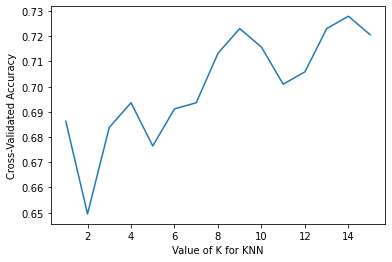

In [24]:
k_range = range(1,16)
k_scores = []

for k in k_range:
    Knn = KNeighborsClassifier(n_neighbors=k)
    Knn.fit(x_train,y_train)
    Y_predict = Knn.predict(x_test)
    score = accuracy_score(y_test,Y_predict)
    k_scores.append(score)
    
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


## 观察上图，最优K是多少？判断依据？

## 答：

由图表知 K=14 时，交叉验证的准确率最高，故最优K为14

## 方法二：使用GridSearchCV来搜索最好的K值。

In [26]:
# 设置需要搜索的K值，'n_neighbors'是sklearn中KNN的参数
from sklearn.model_selection import GridSearchCV

parameters = {'n_neighbors':[i for i in range(1,16)]}

# 通过GridSearchCV来搜索最好的K值。这个模块的内部其实就是怼每一个K值进行评估
clf = GridSearchCV(KNeighborsClassifier(),parameters,cv=5)
clf.fit(x_train,y_train)

# 输出最好的参数以及对应的准确率
print("最终最佳准确率：%.2f"%clf.best_score_,"最终的最佳K值",clf.best_params_)

最终最佳准确率：0.74 最终的最佳K值 {'n_neighbors': 14}


## 准确率是否提高了？提高了多少？

## 答： 

提高了6%的准确率

## 6-7 模型落地应用

In [28]:
## 你朋友拿了一瓶红酒，请你帮他判断是好酒还是坏酒？这瓶酒的特征值已给 X_new

X_new = [[13.2,2.77,2.51,18.55,96.6,1.04,2.55,0.57,1.47,6.2,1.05]]

In [32]:
# 请预测
y_predict1 = clf.predict(X_new)

print('预测的酒的类型：\n',y_predict1)



预测的酒的类型：
 [0]


## 新的这瓶酒，你预测出来是高品质红酒？还是非高品质红酒？推荐他买这瓶酒吗？

## 答：

因为预测的酒输出为0，故酒是非高品质红酒